<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/Predicting_house_prices_(Boston)_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices

## the dataset

In [0]:
from keras import models
from keras import layers

In [0]:
from keras.datasets import boston_housing

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [45]:
train_data.shape

(404, 13)

In [46]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

each feature has a different scale

In [47]:
test_data.shape

(102, 13)

13 numerical features such as per capita crime rate, average number of rooms per dwelling, accessibility to highways etc.

not much data

In [48]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

the targets are the median values of owner-occupied homes, in thousands of dollars

## preparing the data: normalizing the features by using only the training data -> this sould be done within k-fold cv

In [0]:
import numpy as np

In [0]:
# mean = np.mean(train_data, axis=0)

In [0]:
# mean

In [0]:
# std = np.std(train_data, axis=0)

In [0]:
# std

In [0]:
# train_data = (train_data - mean) / std
# test_data = (test_data - mean) / std

In [0]:
# train_data

## Building the network

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layer=layers.Dense(units=64,activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layer=layers.Dense(units=64, activation='relu'))
  model.add(layer=layers.Dense(1))
  model.compile('rmsprop', loss='mse', metrics=['mae'])
  return model

## K-fold validation because not much data and the validation scores might have a high variance with regard to the validation split

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [63]:
for i in range(k):
  print('Processing fold #', i)

  mean = np.mean(train_data, axis=0)
  std = np.std(train_data, axis=0)
  val_data = (train_data[i * num_val_samples: (i+1)*num_val_samples] - mean) / std
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_data = (partial_train_data - mean) / std

  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],axis=0
  )

  model = build_model()
  model.fit(x=partial_train_data, y=partial_train_targets, batch_size=1,epochs=num_epochs, verbose=0)
  val_mse, val_mae = model.evaluate(x=val_data, y=val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [64]:
all_scores

[2.1844528099097826,
 2.5579418545902364,
 2.5499603630292533,
 2.1792959281713657]

In [65]:
np.mean(all_scores)

2.3679127389251593

## Saving the validation logs at each fold

In [66]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('Processing fold #', i)

  mean = np.mean(train_data, axis=0)
  std = np.std(train_data, axis=0)
  val_data = (train_data[i * num_val_samples: (i+1)*num_val_samples] - mean) / std
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_data = (partial_train_data - mean) / std

  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],axis=0
  )

  model = build_model()
  history = model.fit(x=partial_train_data, y=partial_train_targets, batch_size=1,epochs=num_epochs, verbose=0, validation_data=(val_data, val_targets))
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [67]:
all_mae_histories

[[4.143449547267196,
  2.880576445324586,
  2.900721559430113,
  2.721496865300849,
  2.2097498922064753,
  2.354875649556075,
  2.176376408869677,
  2.218601037960241,
  2.533491814490592,
  1.972916045991501,
  2.0757456014652065,
  2.347846814901522,
  2.3293867394475654,
  1.9955559343394667,
  2.0541484473955514,
  2.1492703503901414,
  1.8366962848323407,
  2.978059466522519,
  2.260613743621524,
  1.8011439153463533,
  2.381015390452772,
  2.2217784541668277,
  1.924861435842986,
  1.8930050406125511,
  1.9698593215186997,
  2.310204307631691,
  2.4356750922627968,
  2.020185640542814,
  1.8460551818998734,
  2.0260085965147114,
  1.8601260326876499,
  1.8964827037093663,
  2.0880111562143457,
  1.7654371733712677,
  2.2307989290445156,
  1.9468534110796334,
  1.9466622607542736,
  2.124954639094891,
  1.8526674591668761,
  2.087242957389001,
  2.0137507278140228,
  2.162871304124889,
  2.0120458602905273,
  2.3232967357824346,
  1.9357935083974707,
  1.9100572472751731,
  1.798

In [0]:
# average mae per epoch
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories])
                       for i in range(num_epochs)
]


In [77]:
for i, val in enumerate(average_mae_history):
  print(i, val)

0 4.6353014152829015
1 3.5225330603004683
2 3.180273407756692
3 2.9501885683229654
4 2.8914488270731256
5 2.734917617080235
6 2.697178575071958
7 2.6914851205183723
8 2.7557810686602453
9 2.610052186663788
10 2.6746747977662793
11 2.614233491444352
12 2.730448402980767
13 2.504006764676311
14 2.4601512509997527
15 2.5128407100639722
16 2.380473046019526
17 2.740737634130044
18 2.61232330657468
19 2.4513537966378847
20 2.6651513883382965
21 2.5481390303904465
22 2.4315600607654835
23 2.5134032044080223
24 2.4468694158119733
25 2.524063439652471
26 2.5334925462703892
27 2.3877045388268954
28 2.43663742046545
29 2.4696537728356844
30 2.3754393535085243
31 2.405848725007312
32 2.3910619587001234
33 2.301442369376079
34 2.3372128210445444
35 2.3651272105698538
36 2.3626116006681235
37 2.391771634026329
38 2.3668156590792213
39 2.3486446590706853
40 2.350317336545132
41 2.3560197707450037
42 2.3970399504840962
43 2.42906652936841
44 2.4147445506388596
45 2.3418742725164585
46 2.2389432392498

In [78]:
# best epoch
np.argmin(average_mae_history)

56

## Plotting validation scores

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

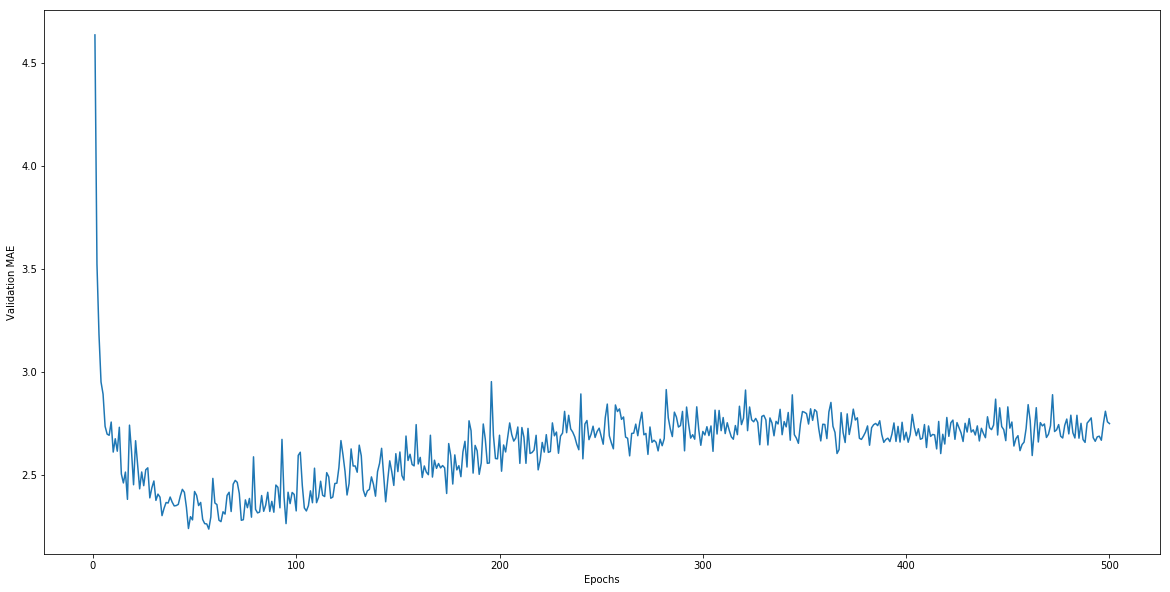

In [74]:
plt.figure(figsize=(20,10))
plt.plot(range(1,num_epochs+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## plotting smoothed validation scores, excluding the first 10 data points

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

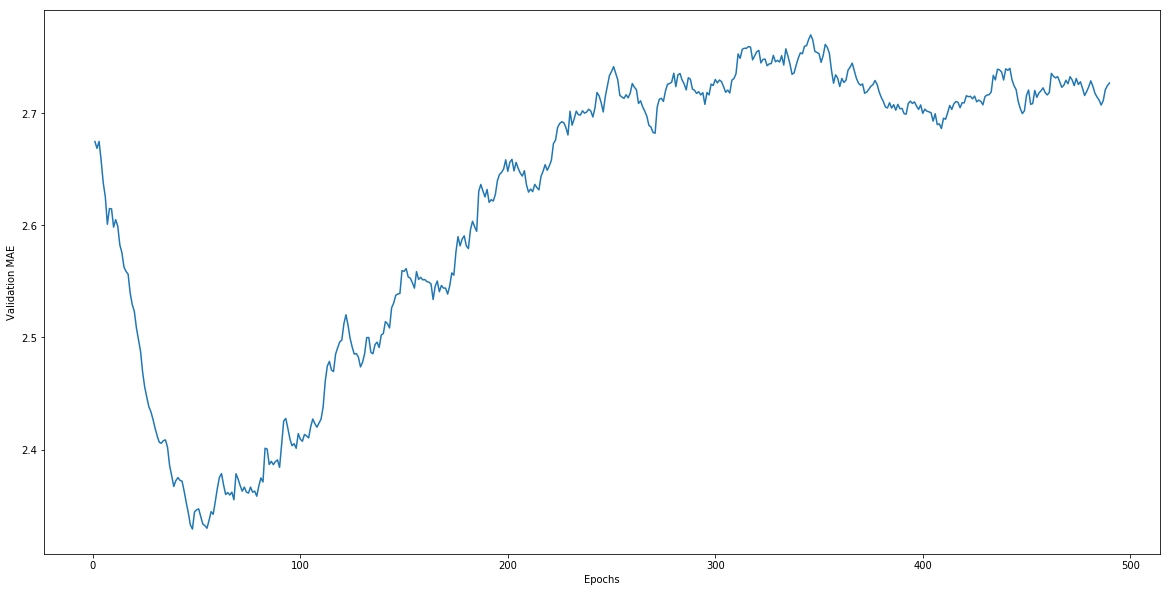

In [83]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training the final model

In [86]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [0]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data,axis=0)
train_data = (train_data - mean) / std

In [0]:
test_data = (test_data - mean) / std


In [0]:
model = build_model()

In [89]:
model.fit(x=train_data, y=train_targets, epochs=56, batch_size=1)

Epoch 1/56
404/404 [==============================] - 2s 4ms/step - loss: 145.1920 - mean_absolute_error: 8.4233
Epoch 2/56
404/404 [==============================] - 1s 2ms/step - loss: 24.8126 - mean_absolute_error: 3.3054
Epoch 3/56
404/404 [==============================] - 1s 2ms/step - loss: 18.9457 - mean_absolute_error: 2.9363
Epoch 4/56
404/404 [==============================] - 1s 2ms/step - loss: 15.8582 - mean_absolute_error: 2.5902
Epoch 5/56
404/404 [==============================] - 1s 3ms/step - loss: 14.0973 - mean_absolute_error: 2.5197
Epoch 6/56
404/404 [==============================] - 1s 2ms/step - loss: 12.8784 - mean_absolute_error: 2.4262
Epoch 7/56
404/404 [==============================] - 1s 2ms/step - loss: 12.0511 - mean_absolute_error: 2.3587
Epoch 8/56
404/404 [==============================] - 1s 2ms/step - loss: 11.6116 - mean_absolute_error: 2.2662
Epoch 9/56
404/404 [==============================] - 1s 3ms/step - loss: 10.7085 - mean_absolute_error

In [92]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

102/102 [==============================] - 0s 3ms/step


In [93]:
test_mae_score

2.73842051449944